In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
imgpath = '/data/BRIDGE/OD-CycleGAN/data/images/sentinel/gan/train/'
imglist = os.listdir(imgpath)

In [53]:
img_name = '25080_5720_25720_6360_BD95.tif'

In [98]:
A = Image.open('./data/A_test.png').convert('RGB')

In [99]:
np.array(A)/255

array([[[0.41176471, 0.41176471, 0.41176471],
        [0.90980392, 0.90980392, 0.90980392],
        [0.55686275, 0.55686275, 0.55686275],
        ...,
        [0.15294118, 0.15294118, 0.15294118],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.05882353, 0.05882353, 0.05882353]],

       [[0.72941176, 0.72941176, 0.72941176],
        [0.58039216, 0.58039216, 0.58039216],
        [0.43529412, 0.43529412, 0.43529412],
        ...,
        [0.16078431, 0.16078431, 0.16078431],
        [0.11372549, 0.11372549, 0.11372549],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.57254902, 0.57254902, 0.57254902],
        [0.54117647, 0.54117647, 0.54117647],
        [0.56470588, 0.56470588, 0.56470588],
        ...,
        [0.17647059, 0.17647059, 0.17647059],
        [0.20784314, 0.20784314, 0.20784314],
        [0.12941176, 0.12941176, 0.12941176]],

       ...,

       [[0.14509804, 0.14509804, 0.14509804],
        [0.14509804, 0.14509804, 0.14509804],
        [0.1372549 , 0

In [100]:
A.size

(640, 640)

In [87]:
import torchvision.transforms as transforms
from data.gan_data import base_dataset

In [96]:
transform_list = []
transform_list.append(transforms.Grayscale(1))
transform_list.append(transforms.Lambda(lambda img: base_dataset.__scale_width(img, 640, 640, transforms.InterpolationMode.BICUBIC)))

transform_list += [transforms.ToTensor()]
#transform_list += [transforms.Normalize((0.5,), (0.5,))]
trans = transforms.Compose(transform_list)

In [97]:
trans(A)

tensor([[[0.4118, 0.9098, 0.5569,  ..., 0.1529, 0.0745, 0.0588],
         [0.7294, 0.5804, 0.4353,  ..., 0.1608, 0.1137, 0.0510],
         [0.5725, 0.5412, 0.5647,  ..., 0.1765, 0.2078, 0.1294],
         ...,
         [0.1451, 0.1451, 0.1373,  ..., 0.0902, 0.0980, 0.0902],
         [0.1529, 0.1373, 0.0980,  ..., 0.1451, 0.1137, 0.0980],
         [0.1137, 0.1451, 0.0980,  ..., 0.1765, 0.0824, 0.0588]]])

In [42]:
np.array(A).shape

(640, 640, 3)

In [106]:
import cv2
AB = cv2.imread(imgpath+img_name, cv2.IMREAD_UNCHANGED)

In [107]:
AB = cv2.cvtColor(AB, cv2.COLOR_BGR2RGB)
A = AB[:,:640,:]; B = AB[:,640:,:]
#A = np.dstack((A[...,0]+A[...,1], A[...,0]+A[...,1], A[...,0]+A[...,1]))
#A = (A - A.min()) * 255/ (A.max() - A.min()) # 0-1 rescaling

In [103]:
A = (A - A.min()) * 255/ (A.max() - A.min()) # 0-1 rescaling
#np.uint8(A)

In [29]:
AB = cv2.hconcat([A, B]) # (640, 1280, 3)

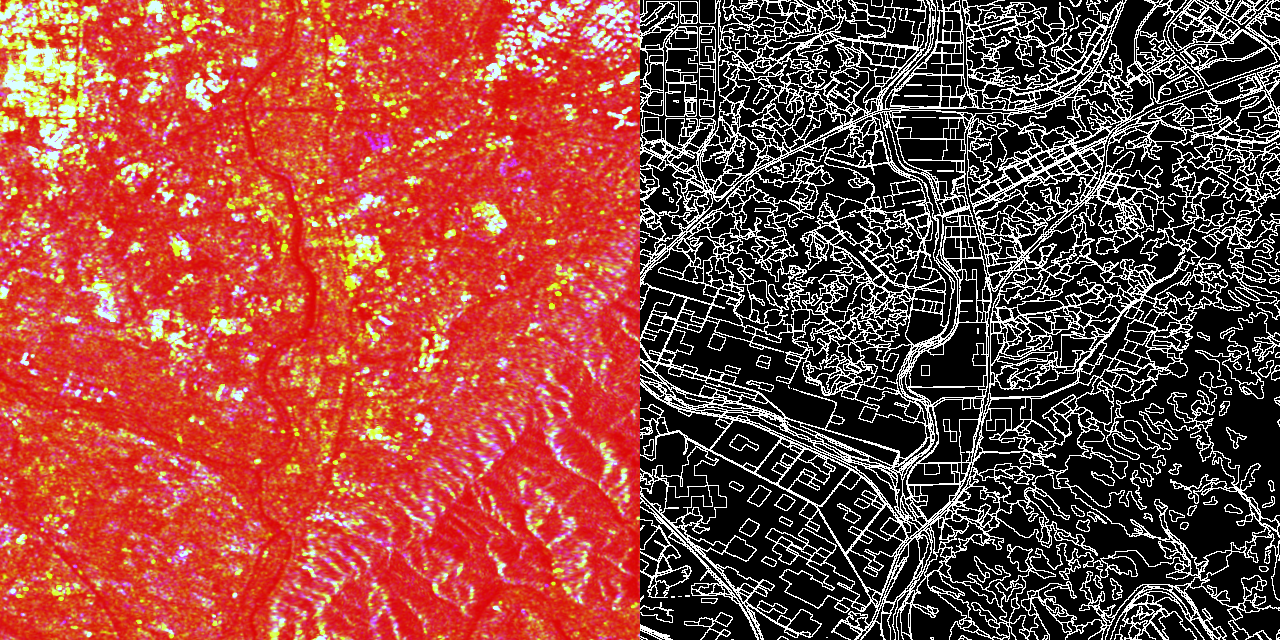

In [108]:
import numpy as np
AB = Image.fromarray(np.uint8(AB*255))
AB

In [7]:
from data.gan_data.base_dataset import BaseDataset, get_params, get_transform
opt= {}
opt.preprocess = 'resize_and_crop'

w, h = AB.size
w2 = int(w / 2)

#A = AB[:, :640, :]
#B = AB[:, 640:, :]
A = AB.crop((0, 0, w2, h))
B = AB.crop((w2, 0, w, h))
# apply the same transform to both A and B
transform_params = get_params(opt, A.size)
A_transform = get_transform(opt, transform_params, grayscale=True)
B_transform = get_transform(opt, transform_params, grayscale=True)
A = A_transform(A)
B = B_transform(B)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [26]:
A.min()

0.0

In [14]:
Image.open(imgpath+imglist[100])

UnidentifiedImageError: cannot identify image file '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/train/15840_4840_16480_5480_08C3.tif'

In [7]:
lblpath = '/data/BRIDGE/yolo-rotate/data/labels/sentinel/org/train/'
lbllist = os.listdir(lblpath)

## Prepare Hyperparameters

In [22]:
import easydict

args = easydict.EasyDict({
    "weights": '',
    "cfg": 'poly_yolov7.yaml',
    "data": 'sentinel.yaml',
    "hyp": 'hyp.scratch.p5.yaml',
    "epochs": 10,
    "image_weights": False,
    "batch_size": 16,
    "cache_images": True,
    "local_rank": -1,
    "world_size": 1,
    "rank": -1,
    "quad": False,
    "workers": 8,
    "polygon": True,
    "divide": False,
    "rect": False,
    "single_cls": True
})
'''
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--weights', type=str, default='', help='initial weights path')
parser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')
parser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')
parser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')
parser.add_argument('--epochs', type=int, default=300)
parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')
parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')
parser.add_argument('--quad', action='store_true', help='quad dataloader')
parser.add_argument('--workers', type=int, default=8, help='maximum number of dataloader workers')
parser.add_argument('--polygon', default=True, action='store_true', help='enable polygon anchor boxes')
parser.add_argument('--divide', default=False, action='store_true', help='divide images into patches')
parser.add_argument('--source', type=str, help='dst source of tif files')
opt = parser.parse_args()

opt.world_size = 1

# error message: https://stackoverflow.com/questions/48796169/how-to-fix-ipykernel-launcher-py-error-unrecognized-arguments-in-jupyter
'''

"\nimport argparse\n\nparser = argparse.ArgumentParser()\nparser.add_argument('--weights', type=str, default='', help='initial weights path')\nparser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')\nparser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')\nparser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')\nparser.add_argument('--epochs', type=int, default=300)\nparser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')\nparser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')\nparser.add_argument('--cache-images', action='store_true', help='cache images for faster training')\nparser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')\nparser.add_argument('--quad', action='store_true', help='quad dataloader')\nparser.add_argument('--workers', t

In [23]:
import yaml 
from utils.general import check_file

gs = 32
train_path = imgpath
imgsz = 640
batch_size = 16

args.hyp  = check_file(args.hyp)
with open(args.hyp) as f:
    hyp = yaml.load(f, Loader=yaml.SafeLoader) 

args.data, args.cfg, args.hyp, args.weights = check_file(args.data), check_file(args.cfg), check_file(args.hyp), check_file(args.weights)  # check files
        


## Prepare Datasets

In [24]:
from utils.datasets import create_dataloader
from utils.general import colorstr

dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, args,
                                            hyp=hyp, augment=True, cache=args.cache_images, rect=args.rect, rank=args.rank,
                                            world_size=args.world_size, workers=args.workers,
                                            image_weights=args.image_weights, quad=args.quad, prefix=colorstr('train: '), 
                                            polygon=args.polygon)

FileNotFoundError: [Errno 2] No such file or directory: './data/yolo-rotate.yaml'

In [1]:
from utils.gdal_preprocess import *

In [2]:
path ='/data/BRIDGE/yolo-rotate/data/images/sentinel/water_line/'

In [32]:
from tifffile import imread
import os
path = '/data/BRIDGE/yolo-rotate/data/images/sentinel/water_line/'
currpath = '/data/BRIDGE/yolo-rotate/data/images/sentinel'
for div_set in ['train','test','valid']:
    fl_list = os.listdir(os.path.join(currpath,div_set))
    fl_list = [f for f in fl_list if f.endswith('tif')]

    for f in fl_list:
        im = imread(os.path.join(currpath,div_set,f))
        im = (im[...,1]==2)*1
        im = np.array(im, np.float32)

        imwrite(os.path.join(path,div_set,f), np.dstack([im, im, im]))

In [3]:
div_set = 'train'
fl_list = os.listdir(os.path.join(path,div_set))
fl_list = [f for f in fl_list if f.endswith('tif')]
fl_list[0]

'4400_1320_5040_1960_B397.tif'

In [28]:
from tifffile import imread
f = fl_list[5]
im = imread(os.path.join(path,div_set,f))

im.shape

(640, 640, 2)

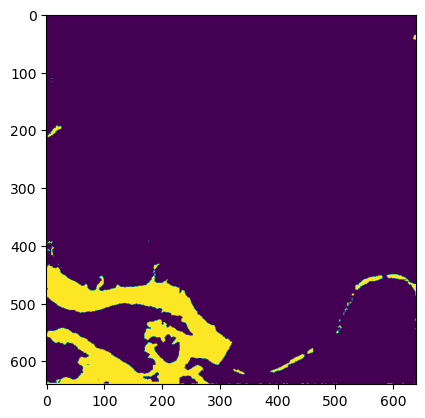

In [29]:
import matplotlib.pyplot as plt
plt.imshow((im[...,1]==2)*1)

In [30]:
f

'2640_7040_3280_7680_8474.tif'

In [18]:
import cv2
path = '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/validA/880_4840_1520_5480_8A42_A.tif'
edge_path = '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/validB/880_4840_1520_5480_8A42_B.tif'

im = cv2.imread(path, cv2.IMREAD_UNCHANGED)

In [19]:
im.shape

(640, 640, 3)

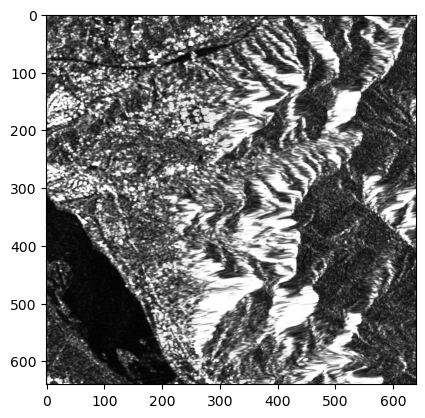

In [20]:
import matplotlib.pyplot as plt
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [25]:
gray = np.uint8(gray*255)
edges = cv2.Canny(gray, threshold1=30, threshold2=80)

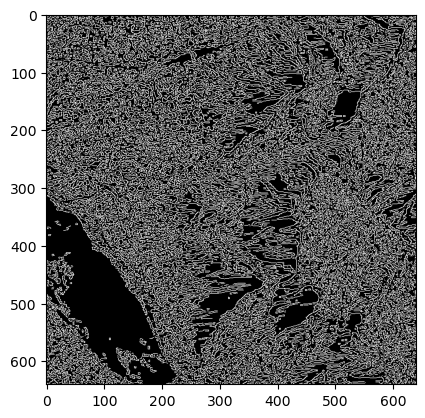

In [26]:
plt.imshow(edges, cmap="gray")

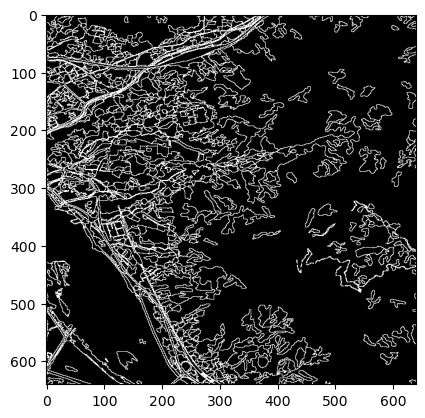

In [27]:
im_edge = cv2.imread(edge_path, cv2.IMREAD_UNCHANGED)
plt.imshow(im_edge, cmap="gray")

In [15]:
import numpy as np

np.uint8(gray*255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 181, 203, 179],
       [  0,   0,   0, ..., 164, 202, 160],
       [  0,   0,   0, ..., 145, 165, 123]], dtype=uint8)

split the image

In [3]:
imgpath = './data/images/sentinel/gan/train/'
imglist = os.listdir(imgpath)
imglist

['30800_9240_31440_9880_2A3F.tif',
 '12320_6160_12960_6800_BC37.tif',
 '3520_5720_4160_6360_F629.tif',
 '3960_15400_4600_16040_D7D1.tif',
 '21120_15840_21760_16480_A5C7.tif',
 '11880_13200_12520_13840_08C3.tif',
 '7480_17160_8120_17800_122F.tif',
 '28600_1320_29240_1960_85C6.tif',
 '16280_11000_16920_11640_A061.tif',
 '5280_9240_5920_9880_464F.tif',
 '12320_2640_12960_3280_464F.tif',
 '15840_15400_16480_16040_08C3.tif',
 '17160_9680_17800_10320_4661.tif',
 '14960_10120_15600_10760_CEFD.tif',
 '25520_8360_26160_9000_A8A5.tif',
 '6160_8800_6800_9440_1AA8.tif',
 '20240_5720_20880_6360_A061.tif',
 '11000_9240_11640_9880_A8A5.tif',
 '11000_12320_11640_12960_D7D1.tif',
 '27280_9240_27920_9880_6E90.tif',
 '29040_3520_29680_4160_CEFD.tif',
 '25080_11880_25720_12520_B338.tif',
 '19800_13200_20440_13840_8A8B.tif',
 '9240_11000_9880_11640_464F.tif',
 '30800_6600_31440_7240_BDB1.tif',
 '24200_3960_24840_4600_B338.tif',
 '22440_7040_23080_7680_BE4F.tif',
 '11000_5720_11640_6360_EFA5.tif',
 '28600_4

In [4]:
import cv2
img = cv2.imread(imgpath+imglist[0], cv2.IMREAD_UNCHANGED)

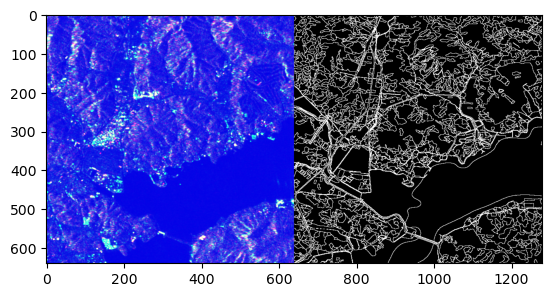

In [5]:
plt.imshow(img)

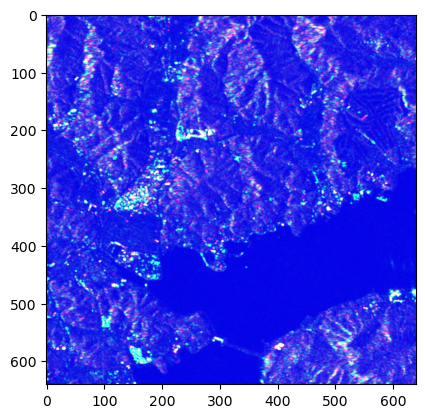

In [8]:
plt.imshow(img[:,:640,:])

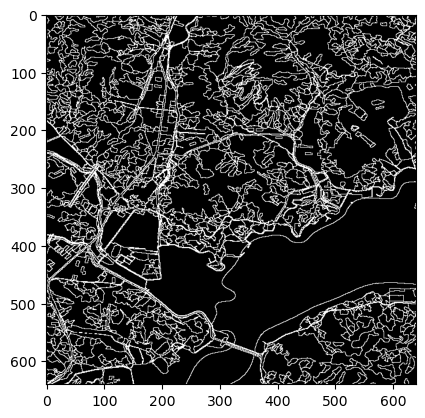

In [9]:
plt.imshow(img[:,640:,:])

In [28]:
## split images 
import os 
import numpy as np 
from pathlib import Path
from tifffile import imwrite
import cv2
import shutil

In [25]:
path = '/data/BRIDGE/OD-CycleGAN/data/images/sentinel/gan/'
txtpath = '/data/BRIDGE/OD-CycleGAN/data/labels/sentinel/sar/'
dstpath = '/data/BRIDGE/OD-CycleGAN/data/images/sentinel/sar'

In [26]:
for m in ['train', 'test', 'valid']:
    os.makedirs(Path(dstpath)/m, exist_ok=True)
    os.makedirs(Path(txtpath)/m, exist_ok=True)

In [5]:
fl_list = os.listdir(Path(path)/'train')
fl_list[:5]

['21120_13640_21760_14280_6E5F.tif',
 '3520_11440_4160_12080_301B.tif',
 '20680_18040_21320_18680_8A8B.tif',
 '23320_1760_23960_2400_4661.tif',
 '5720_13640_6360_14280_6D9B.tif']

In [6]:
Path(path)/'train'/fl_list[0]

PosixPath('/data/BRIDGE/OD-CycleGAN/data/images/sentinel/gan/train/21120_13640_21760_14280_6E5F.tif')

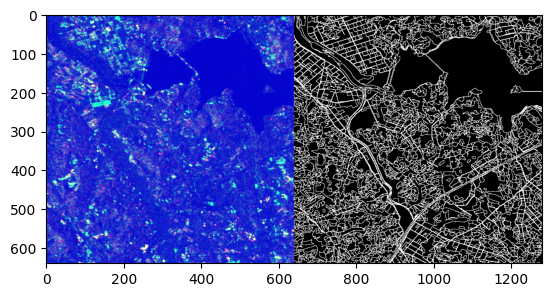

In [7]:
import cv2
import matplotlib.pyplot as plt
fl_path = Path(path)/'train'/fl_list[0]
im = cv2.imread(str(fl_path), cv2.IMREAD_UNCHANGED)
plt.imshow(im)

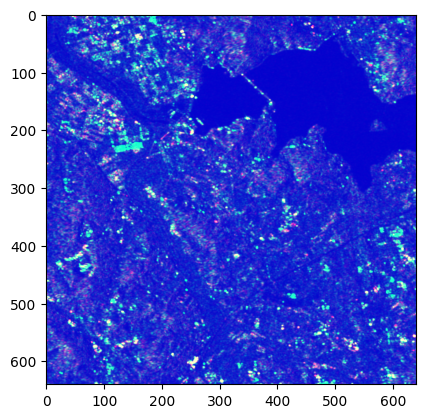

In [8]:
plt.imshow(im[:,:640,:])

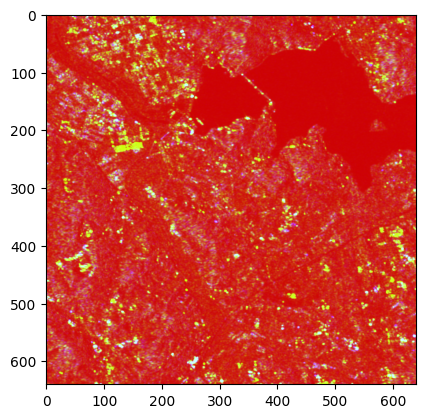

In [18]:
plt.imshow(bgr_im)

In [19]:
bgr_im = cv2.cvtColor(im[:,:640,:], cv2.COLOR_BGR2RGB)
cv2.imwrite('./data/temp.tif', bgr_im)

True

In [52]:
lb_file = './data/labels/sentinel/sar/train/10120_11880_10760_12520_89E8.txt'
with open(lb_file, 'r') as f:
    labels = [x.split() for x in f.read().strip().splitlines()]

In [55]:
np.array(labels, dtype=np.float32)

ValueError: could not convert string to float: 'veh'

In [58]:
l_ = []
for label in labels:
    l_.append(np.concatenate((str(0), label[1:]), axis=None))
l = np.array(l_, dtype=np.float32)

In [59]:
l

array([[0.      , 0.235374, 0.804547, 0.258781, 0.807968, 0.257578,
        0.816203, 0.234172, 0.812798],
       [0.      , 0.271249, 0.749156, 0.275829, 0.75461 , 0.25314 ,
        0.773672, 0.248563, 0.768219]], dtype=float32)

In [61]:
cv2.imread('./data/images/sentinel/sar/train/28160_7920_28800_8560_FFBC.tif', cv2.IMREAD_UNCHANGED)

array([[[0.10227408, 0.46303788, 0.8843613 ],
        [0.11480121, 0.38910374, 0.8843698 ],
        [0.12658048, 0.46301198, 0.88437825],
        ...,
        [0.25210264, 0.60395634, 0.88964826],
        [0.32144383, 0.40721938, 0.8896535 ],
        [0.41035274, 0.2531268 , 0.8896588 ]],

       [[0.20827366, 0.480649  , 0.88435906],
        [0.23857066, 0.44732544, 0.8843676 ],
        [0.24314192, 0.45131236, 0.88437605],
        ...,
        [0.54147655, 0.50333047, 0.8896459 ],
        [0.6441593 , 0.4316008 , 0.8896512 ],
        [0.7107725 , 0.3575492 , 0.8896564 ]],

       [[0.2331989 , 0.43345362, 0.8843568 ],
        [0.2848862 , 0.4195565 , 0.8843653 ],
        [0.26370546, 0.39766   , 0.88437384],
        ...,
        [0.6514048 , 0.3052954 , 0.8896436 ],
        [0.7462155 , 0.29834753, 0.88964885],
        [0.77874994, 0.34246972, 0.88965416]],

       ...,

       [[0.20213304, 0.14383171, 0.8831963 ],
        [0.15024656, 0.08539908, 0.88320607],
        [0.073752  , 0

In [21]:
from tifffile import imwrite
imwrite('./data/tiff_temp.tif', bgr_im)

In [31]:
str(fl_path).replace('gan','sar')

'/data/BRIDGE/OD-CycleGAN/data/images/sentinel/sar/train/21120_13640_21760_14280_6E5F.tif'

In [32]:
for m in ['train', 'test', 'valid']:
    for fl in os.listdir(Path(path)/m):
        fl_path = Path(path)/m/fl
        im = cv2.imread(str(fl_path), cv2.IMREAD_UNCHANGED)

        dst_im = im[:,:640,:]; bgr_im = cv2.cvtColor(dst_im, cv2.COLOR_BGR2RGB)
        imwrite(str(fl_path).replace('gan','sar'), bgr_im)

        src_txt = str(fl_path).replace('images','labels').replace('tif','txt')
        dst_txt = src_txt.replace('gan','sar')
        #shutil.copy(src_txt, dst_txt)
        

In [80]:
## feature fusion

import cv2
im = cv2.imread('./data/org_img.tif', cv2.IMREAD_UNCHANGED)
gan = cv2.imread('./data/gan_norm.tif', cv2.IMREAD_UNCHANGED)

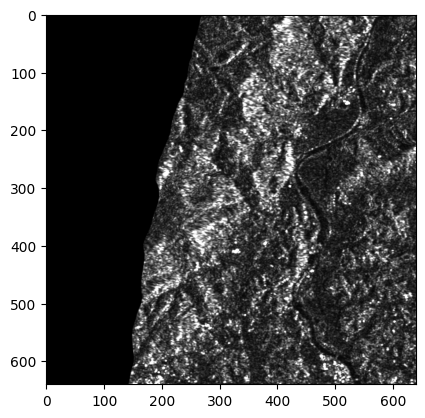

In [76]:
import matplotlib.pyplot as plt
im = np.dstack([im[...,2],im[...,2], im[...,2]])
plt.imshow(im)

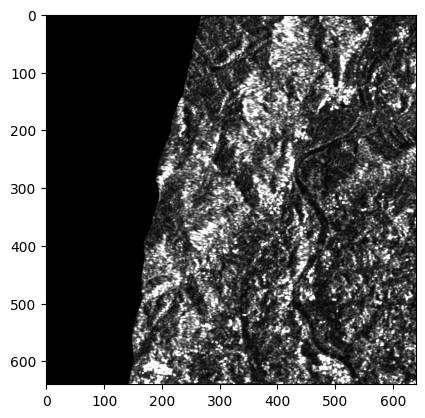

In [81]:
import matplotlib.pyplot as plt
im = np.dstack([im[...,1],im[...,1], im[...,1]])
plt.imshow(im)

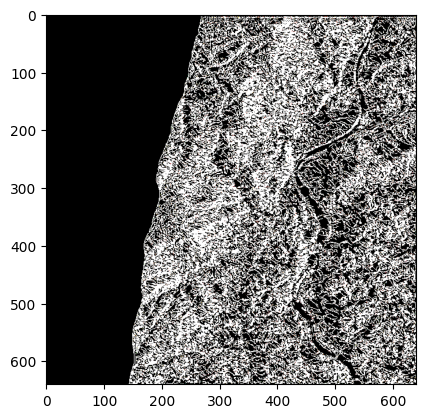

In [71]:
plt.imshow(gan)

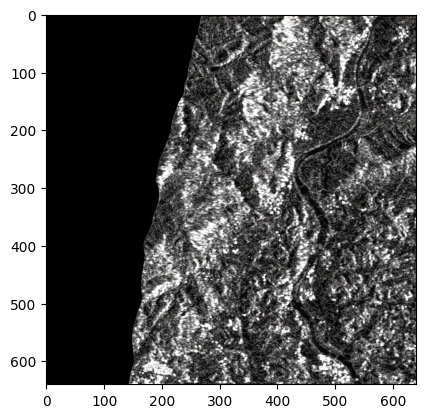

In [82]:
plt.imshow(0.8*im + 0.2*gan)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


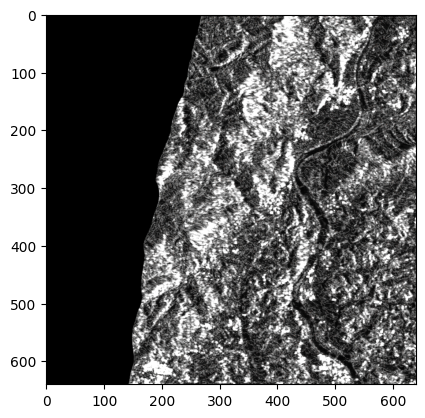

In [88]:
plt.imshow(im+gan*0.2)

In [83]:
new_img = 0.8*im + 0.2*gan
from tifffile import imwrite
imwrite('./data/new_img.tif', new_img)

In [85]:
new_img = im*gan
from tifffile import imwrite
imwrite('./data/new_img2.tif', new_img)

In [89]:
new_img = im+gan*0.2
from tifffile import imwrite
imwrite('./data/new_img3.tif', new_img)